
# Project: Analysing TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. There are all together 21 columns.
- id : Unique ID of the given movie
- imdb_id : Unique imdb id of the movie
- popularity : Popularity score of the given movie (higher the score more popular the movie)
- budget : total budget of the movie
- revenue : total revenue generated by the movie
- original_title : name of the movie
- cast : main casts of the movie
- homepage : website of the movie
- director : director of the movie
- tagline : tagline of the movie
- keywords : main keywords of the movie
- overview : a short description of the movie
- runtime : total runtime of the movie in minute
- genres : genres of the movie
- production_companies : name of the production company of the movie
- release_date : date when the movie was released
- vote_count : total vote for the particular movie
- vote_average : average rating of the movie
- release_year : year when the movie was released
- budget_adj : budget of the associated movie in terms of 2010 dollar
- revenue_adj : revenue of the associated movie in terms of 2010 dollar

## Questions:

This analysis tries to find properties associated with revenue.
- Does movie with higher budget generates higher revenue?
- Does movie with higher runtime generate more revenue?
- Is there any relationship between movie release year and revenue generated?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')


In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> *Observation* : There are lot of columns with null value.

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> *Observation* :There are budget, revenue and runtime which min value is 0 which does not make much sense.


### Cleaning the data

In [8]:
#getting rid of the column that will not be used
column_not_needed = np.array(['homepage','tagline','keywords','overview','production_companies'])
try:
    df = df.drop(columns = column_not_needed)
except:
    print("already dropped those column")


In [9]:
print(df.shape)

(10866, 16)


In [10]:
df[(df['budget']==0) | (df['revenue']==0) | (df['runtime']==0) ]['budget'].count()

7011

> *Observation* : More than 60% of the date has 0 budget,revenue and runtime, we can either replace it by either mean or entirely drop those budget. Replacing such a high number of data with mean may give us biased result so it is better to drop those rows. 

In [11]:
df = df[(df['budget']!=0) & (df['revenue']!=0) & (df['runtime'] != 0)]

In [12]:
df.shape

(3855, 16)

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 16 columns):
id                3855 non-null int64
imdb_id           3855 non-null object
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
cast              3851 non-null object
director          3854 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 512.0+ KB


Finally the data looks clean.

<a id='eda'></a>
## Exploratory Data Analysis




### Revenue

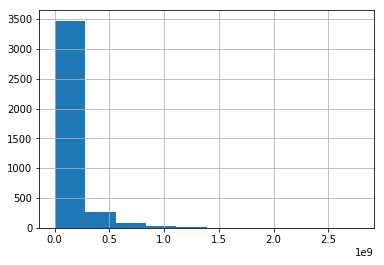

In [15]:
df['revenue'].hist()

> *Observation* : Revenue is positively skewed, that is a lot of movies generates lower revenue and only few of them generates higher revenue.

In [17]:
#Scatter plot with respect to revenue
def scatter_plt( col , xlim1, xlim2 ):
  df.plot(kind='scatter', x = col, y='revenue', alpha= 0.2,xlim=(xlim1,xlim2), ylim=(0,2500000000), 
  figsize=(10,8))
  plt.title("Scatter Plot between "+ col + " and revenue")



### Does movie with higher budget generates higher revenue?

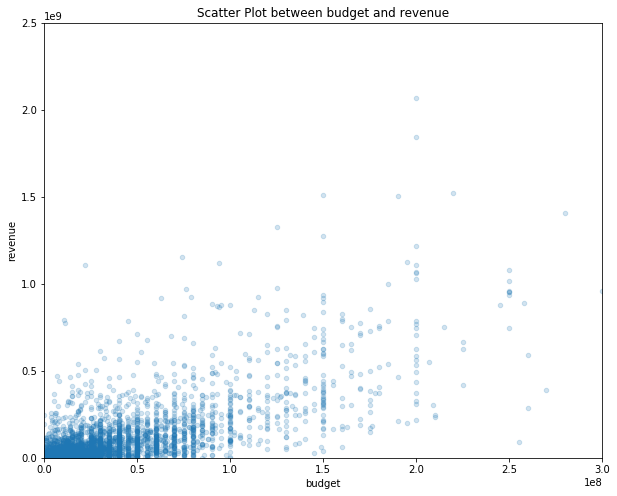

In [18]:
scatter_plt("budget",0,300000000)


In [19]:
mid_budget = df['budget'].median()

<Container object of 2 artists>

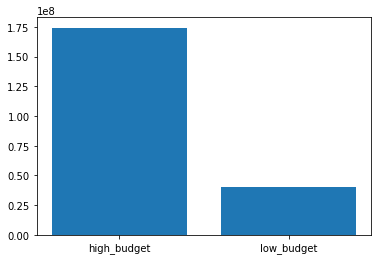

In [20]:
low_budget= df[df['budget'] < mid_budget]
high_budget = df[df['budget'] >= mid_budget]



plt.bar(x = ['low_budget','high_budget'], height = [low_budget['revenue'].mean(),high_budget['revenue'].mean()])

> *Observations* : There is a close relationship between budget and revenue. It seems that in most cases the higher the budget, the higher is the revenue.

### Does movie with higher runtime generate more revenue?

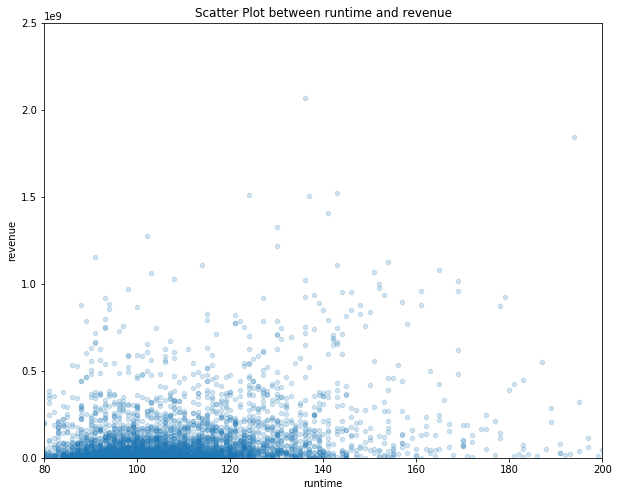

In [21]:
scatter_plt("runtime", 80,200)

In [22]:
mid_runtime = df['runtime'].median()

<Container object of 2 artists>

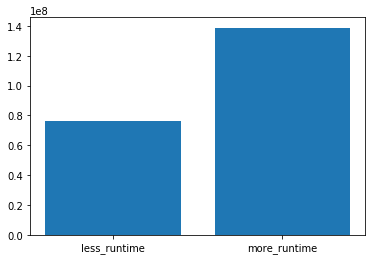

In [23]:
less_runtime= df[df['runtime'] < mid_runtime]
more_runtime = df[df['runtime'] >= mid_runtime]



plt.bar(x = ['less_runtime','more_runtime'], height = [less_runtime['revenue'].mean(),more_runtime['revenue'].mean()])

> *Observations* : There is a relationship between runtime and revenue. It seems that the movie whose runtime is longer tends to generate more revenue than those that have shorter runtime.

### Is there any relationship between movie release year and revenue generated?

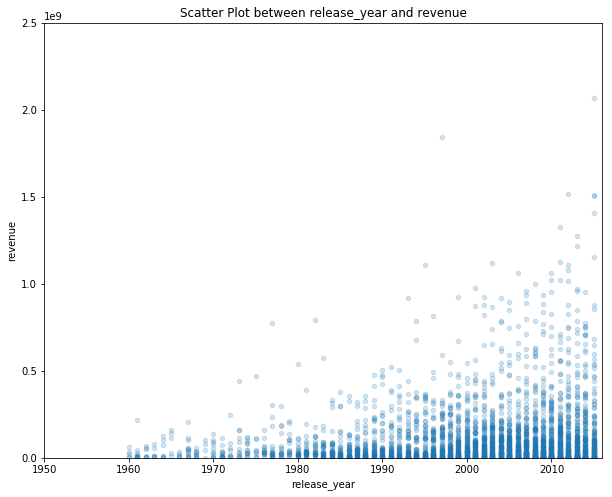

In [29]:
scatter_plt("release_year", 1950, 2016)

> *Observation* : There seems to be a very strong relationship between movie release year and revenue generated by the movie.

<a id='conclusions'></a>
## Conclusions

> The revenue the movie generates is closely related to the initial budget of the movie which makes perfect sense as the movie that has higher budget will is more likely be good and may have been more advertised than the one with lower budget and hence they generate more revenue.

> Likewise,the revenue of movie also seems to depend on the runtime of the movie and it may be because people like to spend more money on longer movies than the shorter ones. Also, revenue seems to depend on the year the movie was released as with time revenue of movies has increased, i.e the later the movie was released the more revenue it tends to generate.



In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0